## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [5]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [6]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [7]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [8]:
df.user_id.unique().size

290584

d. The proportion of users converted.

In [9]:
df.groupby('converted').count()

,user_id,timestamp,group,landing_page
converted,,,,
0,259241,259241,259241,259241
1,35237,35237,35237,35237


In [10]:
df[(df['converted'] == True)].count()

user_id         35237
timestamp       35237
group           35237
landing_page    35237
converted       35237
dtype: int64

In [11]:
df.count()

user_id         294478
timestamp       294478
group           294478
landing_page    294478
converted       294478
dtype: int64

e. The number of times the `new_page` and `treatment` don't line up.

In [12]:
df[(df['group'] == 'treatment') != (df['landing_page'] == 'new_page')].count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

f. Do any of the rows have missing values?

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [14]:
df2 = df.query("(landing_page == 'new_page' and group == 'treatment') or (landing_page == 'old_page' and group == 'control')")

In [15]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [16]:
df2.user_id.unique().size

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [17]:
df2[df2.duplicated('user_id')]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

See result above and quiz answer.

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [18]:
df2.drop_duplicates(subset='user_id', keep='first',inplace=True) 

<ipython-input-18-735cde0a4424>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset='user_id', keep='first',inplace=True)


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2[(df2['converted'] == True)].count() / df2.count()

user_id         0.119597
timestamp       0.119597
group           0.119597
landing_page    0.119597
converted       0.119597
dtype: float64

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df2[((df2['group'] == 'control') & 
     (df2['converted'] == True))].count() / df2[(df2['group'] == 'control')].count()

user_id         0.120386
timestamp       0.120386
group           0.120386
landing_page    0.120386
converted       0.120386
dtype: float64

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df2.groupby([ 'group', 'converted']).size()

group      converted
control    0            127785
           1             17489
treatment  0            128046
           1             17264
dtype: int64

In [22]:
17264/(17264+128046)

0.11880806551510564

d. What is the probability that an individual received the new page?

In [23]:
df2[((df2['group'] == 'treatment') & 
     (df2['converted'] == True))].count() / df2[(df2['group'] == 'treatment')].count()

user_id         0.118808
timestamp       0.118808
group           0.118808
landing_page    0.118808
converted       0.118808
dtype: float64

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**The new page does not present evidence that it leads to more conversions. With a conversion rate of 11.88%, it is below the 12.03% conversion rate of the old page and below the 11.96% overall conversion rate. Based on these figured, the old page should be kept.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**H0: P(new) - P(old) <= 0
If the conversion rate of the new page is less than or equal to the conversion rate of the old page, the new page should be rejected. **

*H1: P(new) - P(old) > 0
If the conversion rate of the new page is greater than the conversion rate of the old page, the old page should be rejected. *

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [71]:
#treatment_df = df.query('group == "treatment"')
#treatment_mean = treatment_df['converted'].mean()
#pnew = treatment_mean
pnew = df2['converted'].mean()
pnew

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [72]:
#control_df = df.query('group == "control"')
#control_mean = control_df['converted'].mean()
#control_mean

pold = pnew

c. What is $n_{new}$?

In [73]:
nnew = df2['group'].value_counts()['treatment']
nnew

145310

d. What is $n_{old}$?

In [74]:
nold = df2['group'].value_counts()['control']
nold

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [75]:
new_page_converted = df2.sample(nnew,replace=True)

pnew=(new_page_converted.query('group == "treatment"')['converted'] == 1).mean()
pnew

0.12009827602865464

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [76]:
old_page_converted = df2.sample(nold,replace=True)

pold=(old_page_converted.query('group == "treatment"')['converted'] == 1).mean()
pold

0.11719915980321707

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [77]:
pnew - pold

0.0028991162254375646

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [78]:
# Create sampling distribution for difference in completion rates
# with boostrapping
p_diffs = []
size = df2.shape[0]
for _ in range(10000):
    b_samp = df2.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "treatment"')
    control_ctr = control_df['converted'].mean()
    experiment_ctr = experiment_df['converted'].mean()
    p_diffs.append(experiment_ctr - control_ctr)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

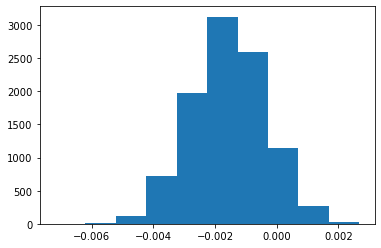

In [79]:
# Convert to numpy array
p_diffs = np.array(p_diffs)

# Plot sampling distribution
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [80]:
# actual observed difference
# actual_diff = pnew - pold
# actual_diff

actual_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()
(p_diffs > actual_diff).mean()

0.5013

In [81]:
size = p_diffs.size

In [82]:
# number greater than actual_diff
num_diff = np.sum(p_diffs > actual_diff )

In [83]:
prop = num_diff / size
prop

0.5013

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In part j, I calculated three values: 1) actual_diff which is the actual value between the averaged converion rate for the new and old pages. This tells us that on average the users in the treatment group spend 0.0015 less seconds on the new page that user in the control group looking at the old page. 2) num_diff which is the number of values in the p_diffs array that are bove the actual observed different actual_diff. 3) and prop, is the proportion of num_diffs to the total size of p_diffs. 

In scientific studies, this value is called the p-value, which represents the statistic significnce of a relationship between the response and explanatory variables. Usually, if the p-value is below 0.05 (5%) or close to 0, then it means that it is statistically significant. Since the value here is close to 90% (0.90) the level of statistical significance indicates we cannot reject the null and there is no statistical significance. 
**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [84]:
import statsmodels.api as sm

len(df.query('landing_page == "old_page" & converted == 1'))
len(df.query('landing_page == "new_page" & converted == 1'))
len(df.query('landing_page == "old_page"'))
len(df.query('landing_page == "new_page"'))

147239

In [38]:
convert_old, convert_new

(88695, 87490)

In [39]:
n_old, n_new

(736195, 736195)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [93]:
zstat, pval = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')

In [94]:
zstat, pval

(3.05968815297347, 0.9988921621761683)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**z-value tells us the number of standard deviation we are about the mean. since this is positive, we are over around 3 standard deviation above the mean. 
p-value tells us the statistical significance in rejecting the null hypothesis. the closer it is to 0, the least likely can we reject the null. in this case, it is very large (~0.99) so we cannot reject the null. 
This conclusion does not differ from what we found before. 
**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**A logistic regression since converted is a binary variable**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [42]:
df['intercept'] = 1
df[['ab_page_0', 'ab_page_1']] = pd.get_dummies(df['landing_page'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [43]:
df['intercept'] = 1
log_mod = sm.Logit(df['converted'], df[['intercept','ab_page_1']])
results = log_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366242
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [44]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              215704.5581
Date:               2020-10-12 12:36 BIC:              215725.7440
No. Observations:   294478           Log-Likelihood:   -1.0785e+05
Df Model:           1                LL-Null:          -1.0785e+05
Df Residuals:       294476           LLR p-value:      0.17120    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0035    0.0081  -248.7715  0.0000  -2.0192  -1.9877
ab_page_1     0.0155    0.0114     1.3683  0.1712  -0.0067   0.0378
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with the ab_page is 0.1712. This is in relation to the other dymmy variable I created ab_page_0, which means we are holding the control constant.


Add-on: the difference between p-values of Part 2 and 3 is because we have performed a one-tailed test in Part 2, and in Part 3, we are performing a two-tailed test. The one-tailed test only tested the significance level of whether or not the new landing page is more effective at converting users. In the two-tailed test, we also test the opposite which is whether the new landing page was not effective at converting. A one tailed approach is effective at testing only one relationship, and assumptions about the other relationship might be easily done. **

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**It's alway a good idea to consider other factors if the data is available. However, there might be some disadvantages to this because sometime variables can be corrolated to each other (multicolinerarity). But this can be identified in the result, and model can be re-run fairly quickly after certain variables are dropped**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [45]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [46]:
df_new

,country,timestamp,group,landing_page,converted
user_id,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0
...,...,...,...,...,...
653118,US,2017-01-09 03:12:31.034796,control,old_page,0
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0


In [47]:
# create dummies for country
d_dum = pd.get_dummies(df_new['country'])
df_new2 = df_new.join(d_dum)

In [49]:
df_new2

,country,timestamp,group,landing_page,converted,CA,UK,US
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0
...,...,...,...,...,...,...,...,...
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,0,0,1
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,0,1,0


In [58]:
# using the UK as intercept
df_new2['intercept'] = 1
lm2 = sm.Logit(df_new2['converted'], df_new2[['intercept', 'CA', 'US']])
results = lm2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Mon, 12 Oct 2020   Pseudo R-squ.:               1.521e-05
Time:                        12:43:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

The results show that 1) users in Canada are less likely to convert that user in the UK by -0.0053 and 2) users in the US are less likely to convert that user in the UK by -0.001. In general, it does appear that country has an impact on conversions, but not by much. Or I suppose whatever the practcial significance is here. Anothe useful question would be to know what $ is associated with an increase in conversion rate. But we don't have that info.  

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [60]:
#create dummies for landing page
d_dum2 = pd.get_dummies(df_new2['landing_page'])
df_new3 = df_new2.join(d_dum2)

In [61]:
df_new3

,country,timestamp,group,landing_page,converted,CA,UK,US,intercept,new_page,old_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,0,0,1,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,0,1,0,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,0,0,1,1,0,1
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,0,1,0,1,0,1
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,0,1,0,1,0,1


In [101]:
df_new3['UK_new_page'] = df_new3['UK'] * df_new3['new_page']
df_new3['US_new_page'] = df_new3['US'] * df_new3['new_page']
df_new3['CA_new_page'] = df_new3['CA'] * df_new3['new_page']

In [104]:
#using Canada as intercept
df_new3['intecept'] = 1
lm2 = sm.Logit(df_new3['converted'], df_new3[['intercept', 'UK', 'US','UK_new_page', 'US_new_page']])
results = lm2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Mon, 12 Oct 2020   Pseudo R-squ.:               2.691e-05
Time:                        15:01:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2205
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0375      0.026    -78.364      0.000      -2.088      -1.987
UK              0.0453      0.031      1.481      0.139      -0.015       0.105
US              0.0511      0.028      1.841      0.066      -0.003       0.105
UK_new_page     0.0108      0.023      0.475      0.635      -0.034       0.056
US_new_page    -0.0206      0.014     -1.505      0.132      -0.047       0.006
===============================================================================
"""

In [105]:
#using UK as intercept
df_new3['intecept'] = 1
lm2 = sm.Logit(df_new3['converted'], df_new3[['intercept', 'US', 'CA','US_new_page', 'CA_new_page']])
results = lm2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Mon, 12 Oct 2020   Pseudo R-squ.:               3.376e-05
Time:                        15:01:53   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1265
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9868      0.011   -174.174      0.000      -2.009      -1.964
US              0.0003      0.015      0.022      0.982      -0.029       0.030
CA             -0.0172      0.038     -0.450      0.652      -0.092       0.058
US_new_page    -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA_new_page    -0.0674      0.052     -1.297      0.195      -0.169       0.034
===============================================================================
"""

In [106]:
#using US as intercept
df_new3['intecept'] = 1
lm2 = sm.Logit(df_new3['converted'], df_new3[['intercept', 'UK', 'CA','UK_new_page', 'CA_new_page']])
results = lm2.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290579
Method:                           MLE   Df Model:                            4
Date:                Mon, 12 Oct 2020   Pseudo R-squ.:               2.417e-05
Time:                        15:01:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.2729
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -1.9967      0.007   -292.314      0.000      -2.010      -1.983
UK              0.0045      0.018      0.257      0.797      -0.030       0.039
CA             -0.0073      0.037     -0.196      0.844      -0.080       0.065
UK_new_page     0.0108      0.023      0.475      0.635      -0.034       0.056
CA_new_page    -0.0674      0.052     -1.297      0.195      -0.169       0.034
===============================================================================
"""

Final Conclusion: 
After running three regression models (each using difference countries as intercepts) I concluded that country of user does not have statistical significance. None of the P-values in the model outputs were smaller than 0.05 (5%). However, out of the three Canada seemed to be the country with the greatest likelihood of converted users, althoguh not significant. 

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.